In [29]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipykernel_2219/3896895136.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [30]:
!pip install torchvision


import torchvision
MNIST = torchvision.datasets.MNIST(".", download=True)
train_data = MNIST.train_data
train_labels = MNIST.train_labels
test_data = MNIST.test_data
test_labels = MNIST.test_labels

In [31]:
# Importing Required Libraries

# Import the MNIST dataset from torchvision
import torchvision

# Import numpy for data manipulation
import numpy as np

# Load the MNIST dataset and download it if necessary
MNIST = torchvision.datasets.MNIST(".", download=True)

# Extract the training data, training labels, test data, and test labels from the MNIST dataset
train_data = MNIST.train_data
train_labels = MNIST.train_labels
test_data = MNIST.test_data
test_labels = MNIST.test_labels

# Combining and Subsampling Data

# Vertically combine the training and test data arrays
data = np.vstack([train_data, test_data])

# Vertically combine the training and test labels arrays
labels = np.hstack([train_labels, test_labels])

# Set a random seed for reproducibility
np.random.seed(42)

# Randomly select 20,000 samples from the combined data without replacement
indices = np.random.choice(len(data), size=20000, replace=False)

# Update the 'data' array to include only the selected samples
data = data[indices]

# Update the 'labels' array to include only the labels corresponding to the selected samples
labels = labels[indices]

# Reshape the 'data' array to ensure it is a 2D array
data = data.reshape(data.shape[0], -1)

# Explanation:
# This code imports the MNIST dataset using torchvision and extracts the training and test data along with their labels.
# It then vertically combines the training and test data arrays, as well as the labels arrays, to create a larger dataset.
# Randomly, 20,000 samples are selected from the combined dataset without replacement to reduce its size.
# Finally, both the 'data' and 'labels' arrays are reshaped into 2D arrays, which is a common format for input to machine learning models.


In [32]:
data.shape

(20000, 784)

In [33]:
data[2]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [34]:
labels=labels.reshape(20000,1)

In [35]:
labels[0]

array([6])

In [36]:
data = np.concatenate((labels, data),axis=1)

In [37]:
data[:,0]

array([6, 8, 7, ..., 2, 1, 8])

In [38]:
# extract labels (number IDs) and remove from data
labels = data[:,0]
data = data[:,1:]

print(labels.shape)
print(data.shape)

(20000,)
(20000, 784)


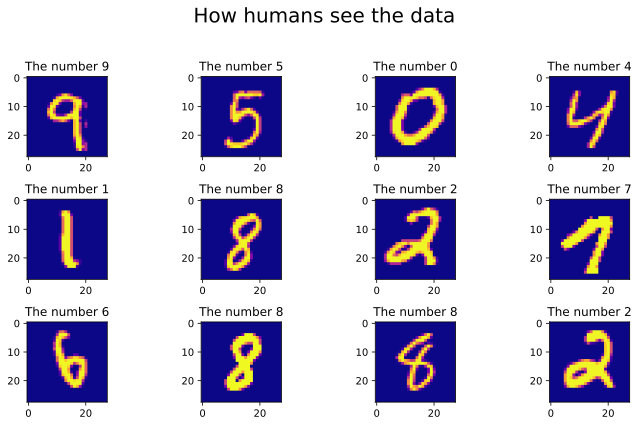

In [39]:
# Show a few random digits using matplotlib
fig, axs = plt.subplots(3, 4, figsize=(10, 6))

# Loop through each subplot in the grid
for ax in axs.flatten():
  # Pick a random image index
  randimg2show = np.random.randint(0, high=data.shape[0])

  # Create the image by reshaping the data (assuming it's flattened)
  img = np.reshape(data[randimg2show, :], (28, 28))

  # Display the image using a grayscale colormap
  ax.imshow(img, cmap='plasma')

  # Set the title of the subplot to the corresponding label
  ax.set_title('The number %i' % labels[randimg2show])

# Add a title to the entire plot
plt.suptitle('How humans see the data', fontsize=20)

# Adjust the layout of subplots for better presentation
plt.tight_layout(rect=[0, 0, 1, .95])

# Show the plot
plt.show()

# Explanation:
# In this code, we are displaying a grid of random digit images along with their corresponding labels.
# - We create a 3x4 grid of subplots using plt.subplots to display a total of 12 images.
# - We use a loop to iterate through each subplot (ax) in the axs array.
# - Inside the loop, we randomly select an image index (randimg2show) from the dataset.
# - We reshape the selected data (assumed to be flattened) into a 28x28 image and store it in the variable 'img.'
# - We display the image on the current subplot using ax.imshow, specifying a grayscale colormap.
# - We set the title of the subplot to indicate the number corresponding to the displayed digit.
# - Finally, we add a main title to the entire plot, adjust subplot layout, and display the plot.
# This code provides a visual representation of randomly selected digit images from the dataset.


/tmp/ipykernel_2219/4183245405.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(data[randimg2show, :], 'ko',color='green') # Set the title of the subplot to the corresponding label


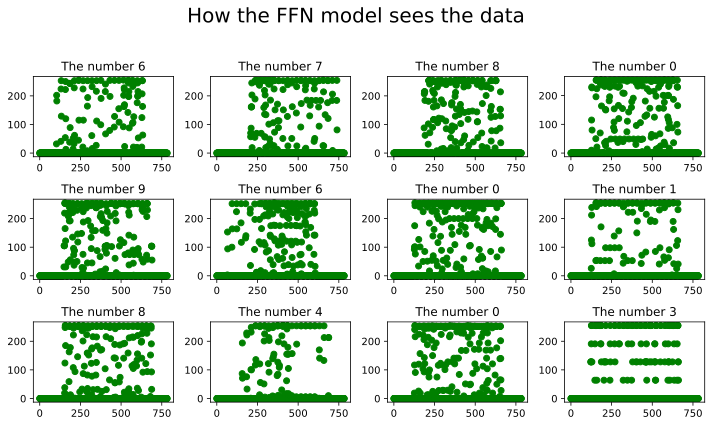

In [40]:
# Show a few random digits as plots
fig, axs = plt.subplots(3, 4, figsize=(10, 6))

# Loop through each subplot in the grid
for ax in axs.flatten():
  # Pick a random image index
  randimg2show = np.random.randint(0, high=data.shape[0])

  # Create a plot of the data for the selected image
  ax.plot(data[randimg2show, :], 'ko',color='green') # Set the title of the subplot to the corresponding label
  ax.set_title('The number %i' % labels[randimg2show])

# Add a title to the entire plot
plt.suptitle('How the FFN model sees the data', fontsize=20)

# Adjust the layout of subplots for better presentation
plt.tight_layout(rect=[0, 0, 1, .95])

# Show the plot
plt.show()

# Explanation:
# In this code, we are displaying a grid of random digit images as plots, as seen by a Feedforward Neural Network (FFN) model.
# - We create a 3x4 grid of subplots using plt.subplots to display a total of 12 plots.
# - We use a loop to iterate through each subplot (ax) in the axs array.
# - Inside the loop, we randomly select an image index (randimg2show) from the dataset.
# - We create a plot of the data for the selected image using ax.plot, representing it as black circles ('ko').
# - We set the title of the subplot to indicate the number corresponding to the displayed digit.
# - Finally, we add a main title to the entire plot, adjust subplot layout, and display the plot.
# This code visualizes random digit images from the dataset as plots, representing how an FFN model perceives the data.


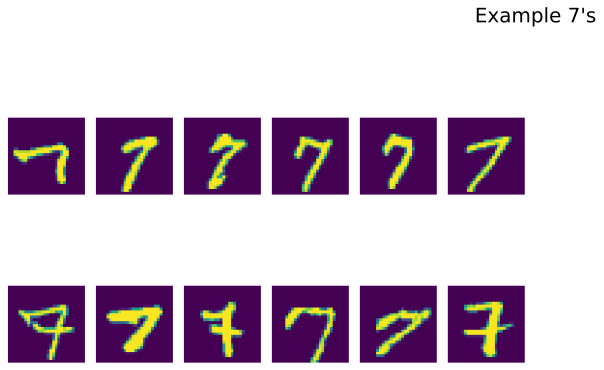

In [41]:
# Visualize some examples of digit 7 from the dataset

# Find the indices of all the digit 7's in the dataset
the7s = np.where(labels == 7)[0]

# Create a 2x6 grid for displaying 12 examples
fig, axs = plt.subplots(2, 6, figsize=(15, 6))

# Loop through each subplot in the grid
for i, ax in enumerate(axs.flatten()):
  # Retrieve and reshape the image data for the current example
  img = np.reshape(data[the7s[i], :], (28, 28))
  
  # Display the image in grayscale
  ax.imshow(img, cmap='viridis')
  
  # Turn off axis labels to focus on the images
  ax.axis('off')

# Add a main title for the plot
plt.suptitle("Example 7's", fontsize=20)

# Adjust the layout for better presentation
plt.tight_layout(rect=[0, 0, .5, .95])

# Show the plot
plt.show()

# Explanation:
# In this code, we are visualizing examples of the digit 7 from the dataset.
# - We first find the indices of all the instances where the label is 7 (the7s).
# - We then create a 2x6 grid of subplots to display a total of 12 examples.
# - Inside a loop, we retrieve and reshape the image data for each example.
# - We display the image using ax.imshow in grayscale, turning off axis labels to focus on the images.
# - Finally, we add a main title to the entire plot, adjust the layout, and display the plot.
# This code helps visualize and inspect some representative examples of the digit 7 in the dataset.


(2135, 784)


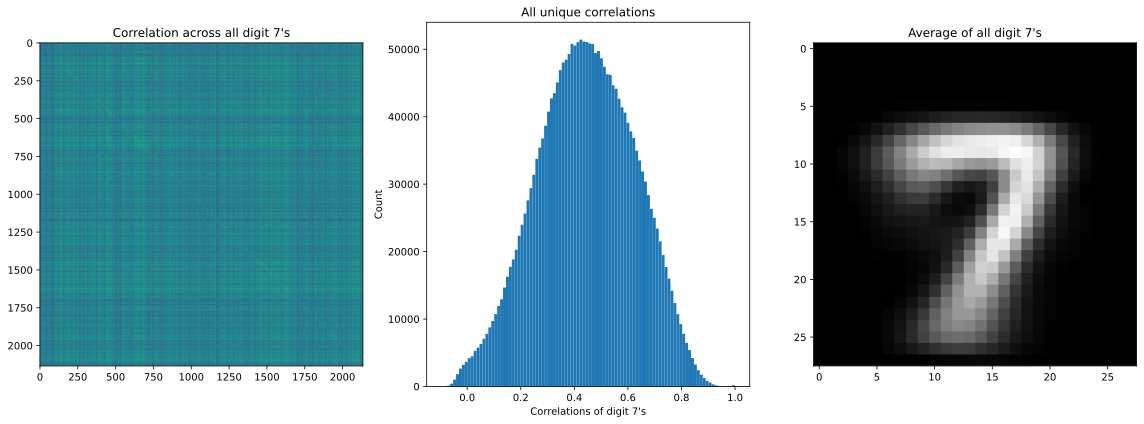

In [42]:
# Analyzing the similarity of digit 7 images

# Count how many examples of digit 7 are in the dataset
print(data[the7s, :].shape)

# Compute spatial correlations among all digit 7 images
C = np.corrcoef(data[the7s, :])

# Create subplots to display the results
fig, ax = plt.subplots(1, 3, figsize=(16, 6))

# Display the correlation matrix
ax[0].imshow(C, vmin=0, vmax=1)
ax[0].set_title("Correlation across all digit 7's")

# Extract unique correlations and visualize as a histogram
uniqueCs = np.triu(C, k=1).flatten()
ax[1].hist(uniqueCs[uniqueCs != 0], bins=100)
ax[1].set_title('All unique correlations')
ax[1].set_xlabel("Correlations of digit 7's")
ax[1].set_ylabel('Count')

# Compute and display the average of all digit 7 images
aveAll7s = np.reshape(np.mean(data[the7s, :], axis=0), (28, 28))
ax[2].imshow(aveAll7s, cmap='gray')
ax[2].set_title("Average of all digit 7's")

# Adjust subplot layout for better presentation
plt.tight_layout()

# Show the plot
plt.show()

# Explanation:
# In this code, we analyze the similarity of digit 7 images in the dataset:
# - We start by printing the number of examples of digit 7 in the dataset.
# - We calculate the spatial correlations among all digit 7 images and store them in the matrix C.
# - We create a figure with three subplots to visualize the results.
# - The first subplot displays the correlation matrix, showing how similar the digit 7 images are to each other.
# - The second subplot shows a histogram of all unique correlations, providing insights into the image similarity distribution.
# - The third subplot displays the average of all digit 7 images, revealing the typical representation of digit 7 in the dataset.
# - Finally, we adjust the layout and display the plot.
# This code helps us understand the correlations and relationships among digit 7 images in the dataset.
